## **Predicting Housing Prices for regions in the USA.**

The data contains the following columns:

* 'Avg. Area Income': Avg. Income of residents of the city house is located in.
* 'Avg. Area House Age': Avg Age of Houses in same city
* 'Avg. Area Number of Rooms': Avg Number of Rooms for Houses in same city
* 'Avg. Area Number of Bedrooms': Avg Number of Bedrooms for Houses in same city
* 'Area Population': Population of city house is located in
* 'Price': Price that the house sold at
* 'Address': Address for the house

In [1]:
# importing librarires
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

In [2]:
# loading csv data to dataframe 
USA_Housing = pd.read_csv('data/USA_Housing.csv')
# checking out the Data
USA_Housing.head()


,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [4]:
#checking columns and total records
USA_Housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


 **Generating descriptive statistics that summarize the central tendency, dispersion and shape of a dataset’s distribution, excluding NaN value.
**

In [5]:
USA_Housing.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562388,5.322283,6.299250,3.140000,29403.928702,9.975771e+05
50%,68804.286404,5.970429,7.002902,4.050000,36199.406689,1.232669e+06
75%,75783.338666,6.650808,7.665871,4.490000,42861.290769,1.471210e+06
max,107701.748378,9.519088,10.759588,6.500000,69621.713378,2.469066e+06


## **Exploratory Data Analysis**


**Visualizing the Entire Data using pairplot**

Exploring types of relationship across the entire dataset

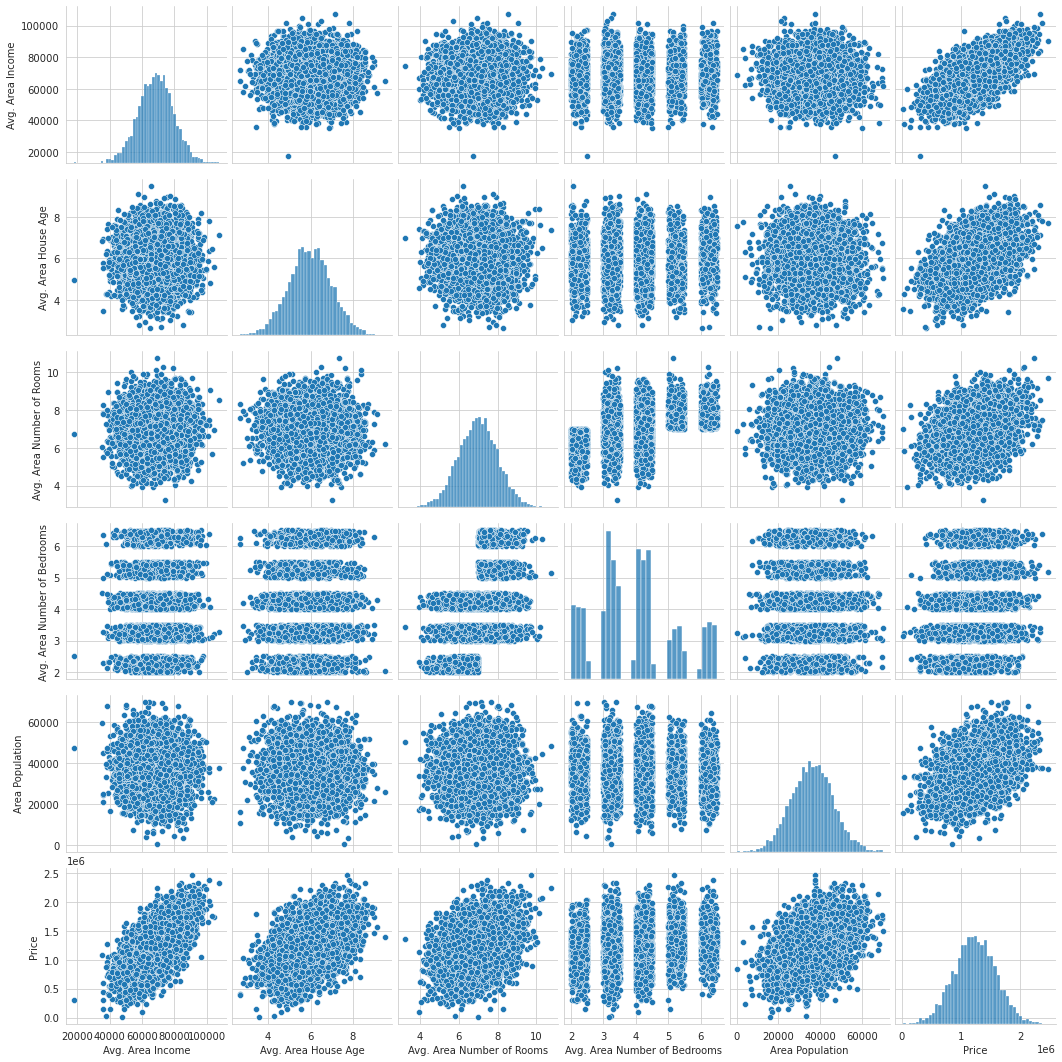

In [6]:
sns.pairplot(USA_Housing);

## **Distribution of Housing Price Across USA**

/home/gonzalo/Documentos/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


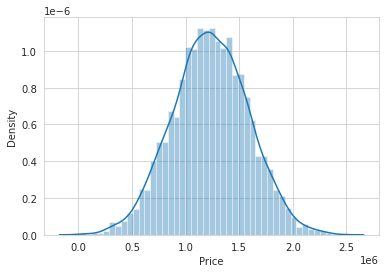

In [7]:
sns.distplot(USA_Housing['Price']);

In [9]:
#Displaying correlation among all the columns 
USA_Housing.corr()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
Avg. Area Income,1.000000,-0.002007,-0.011032,0.019788,-0.016234,0.639734
Avg. Area House Age,-0.002007,1.000000,-0.009428,0.006149,-0.018743,0.452543
Avg. Area Number of Rooms,-0.011032,-0.009428,1.000000,0.462695,0.002040,0.335664
Avg. Area Number of Bedrooms,0.019788,0.006149,0.462695,1.000000,-0.022168,0.171071
Area Population,-0.016234,-0.018743,0.002040,-0.022168,1.000000,0.408556
Price,0.639734,0.452543,0.335664,0.171071,0.408556,1.000000


## **Displaying correlation among all the columns using Heat Map**


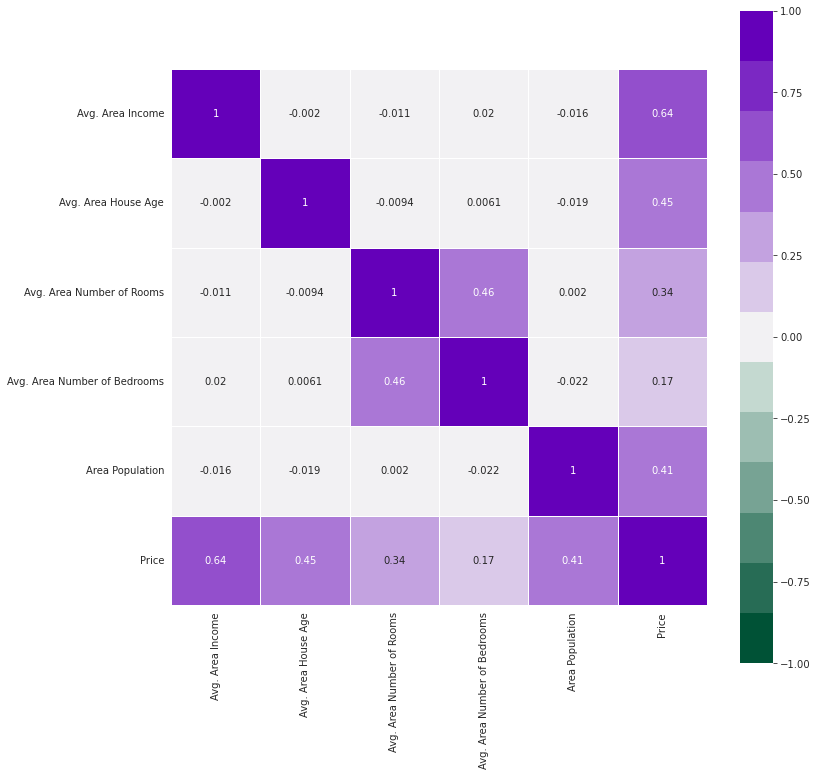

In [10]:
plt.figure(figsize=(12,12))
sns.heatmap(USA_Housing.corr(),
           vmin = -1,
           vmax = 1,
           annot=True,
           square = True,
           linewidths = .5,
           cmap=sns.diverging_palette(150, 277, s=100, l=30, n=13));

## **Training a Linear Regression Model**

[](http://)We will need to first split up our data into an X array that contains the features to train on, and a y array with the target variable, in this case the Price column. We will toss out the Address column because it only has text info that the linear regression model can't use.

### X and y arrays

In [11]:
#Getting all Coulmn names
USA_Housing.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address'],
      dtype='object')

y = a + b1*X + b2*X

In [12]:
# Columns as Features
X = USA_Housing[['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population']]

In [13]:
# Price is my Target Variable, what we trying to predict
y = USA_Housing['Price']

## **Training the Model**

Now that we've explored the data a bit, let's go ahead and split the data into training and testing sets.


In [17]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [18]:
print('Total features shape: ', X.shape)

Total features shape:  (5000, 5)


In [20]:
#Importing the Linear Regression Algorithm
from sklearn.linear_model import LinearRegression

In [21]:
#creating LinearRegression object
lm = LinearRegression()

#Training the data
lm.fit(X_train, y_train)

LinearRegression()

In [ ]:
print("Total features shape:", X.shape)
print("Train features shape:", X_train.shape)
print("Train target shape:", y_train.shape)
print("Test features shape:", X_test.shape)
print("Test target shape:", y_test.shape)

In [ ]:
#importing the Linear Regression Algorithm


In [ ]:
#creating LinearRegression Object


In [ ]:
#Training the Data Model


 ## **Model Evaluation**


Let's evaluate the model by checking out it's coefficients 

y = a + bX + ...

In [22]:
#Displaying the Intercept
print(lm.intercept_)

-2638673.4261916303


In [24]:
#Displaying the Coefficents
print(lm.coef_)

[2.16257989e+01 1.65590393e+05 1.19827783e+05 2.36109526e+03
 1.52165814e+01]


In [26]:
coef_df = pd.DataFrame(lm.coef_, X.columns, columns=['Coefficient'])
coef_df

,Coefficient
Avg. Area Income,21.625799
Avg. Area House Age,165590.392746
Avg. Area Number of Rooms,119827.783390
Avg. Area Number of Bedrooms,2361.095262
Area Population,15.216581


In [ ]:
#Displaying the Intercept


In [ ]:
coeff_df = pd.DataFrame(lm.coef_,
                        X.columns,
                        columns=['Coefficient'])
coeff_df

**Interpreting the coefficients:**

- Holding all other features fixed, a 1 unit increase in **Avg. Area Income** is associated with an **increase of \$21.62**.
- Holding all other features fixed, a 1 unit increase in **Avg. Area House Age** is associated with an **increase of \$165590.39**.
- Holding all other features fixed, a 1 unit increase in **Avg. Area Number of Rooms** is associated with an **increase of \$119827.78**.
- Holding all other features fixed, a 1 unit increase in **Avg. Area Number of Bedrooms** is associated with an **increase of \$2361.09**.
- Holding all other features fixed, a 1 unit increase in **Area Population** is associated with an **increase of \$15.21**.


## **Predictions from our Model**

Let's grab predictions off our test set and see how well it did!

In [27]:
X_test

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population
1501,61907.593345,7.017838,6.440256,3.25,43828.947207
2586,57160.202243,6.893260,6.921532,3.13,43467.147035
2653,70190.796445,6.745054,6.662567,2.01,29215.136112
1055,69316.796889,6.300409,7.873576,4.28,24448.211461
705,72991.481649,3.412866,6.494081,2.48,50626.495426
...,...,...,...,...,...
3563,74208.124644,6.259782,8.666717,3.38,25507.336340
1538,71112.350296,5.612677,7.419542,4.26,24134.413996
1837,63665.394418,6.729105,7.732959,3.43,44029.681816
2380,56073.892443,6.576733,6.959056,4.40,64149.680213


In [28]:
predictions = lm.predict(X_test)
predictions

array([1308536.13592627, 1237122.72746484, 1243835.62817059, ...,
       1457119.79297249, 1483428.95309395, 1047510.59737165])

/home/gonzalo/Documentos/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


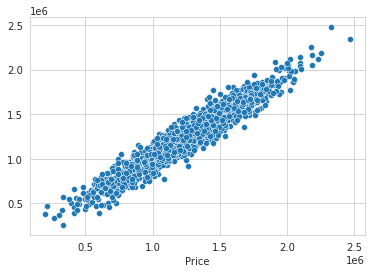

In [29]:
sns.scatterplot(y_test, predictions);

In [31]:
#Introducimos nuevas casas
new_home = np.array([
    [100000, 20, 8, 9, 100000],
    [110000, 40, 16, 18, 110000]])

lm.predict(new_home)

array([5337244.5869189 , 9997348.36969604])

## **Residual Histogram**

**Ploting a histogram of the residuals and making sure it looks normally distributed.** If not, linear regression is nos appropiate for this analysis. Normally distribution of residuals is an assumption for Linear Regression.

/home/gonzalo/Documentos/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


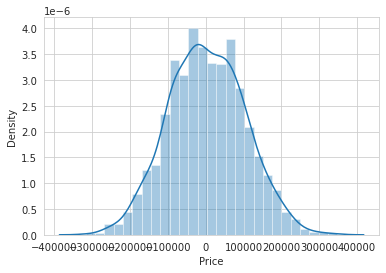

In [33]:
sns.distplot((y_test - predictions));

**Calculating the Mean Absolute Error, Mean Squared Error, and the Root Mean Squared Error**

- **MAE** is the easiest to understand, because it's the average error.
- **MSE** is more popular than MAE, because MSE "punishes" larger errors, which tends to be useful in the real world.
- **RMSE** is even more popular than MSE, because RMSE is interpretable in the "y" units.

All of these are **loss functions**, because we want to minimize them.

In [35]:
from sklearn import metrics

lm.score(X_test, y_test)

0.9146818498753992

In [36]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 81135.56609336873
MSE: 10068422551.401155
RMSE: 100341.52954485573


## Feature importance

In [37]:
intercept = lm.intercept_
features = pd.DataFrame(lm.coef_, X_train.columns, columns=['coefficient'])
features.head().sort_values('coefficient', ascending=False)

,coefficient
Avg. Area House Age,165590.392746
Avg. Area Number of Rooms,119827.783390
Avg. Area Number of Bedrooms,2361.095262
Avg. Area Income,21.625799
Area Population,15.216581


y = w1.X1 + w2.X2 + w3.X3

One extra room increases the price (Y) in 2300, and one extra dollar un area income increases price in 21. This is the meaning of the coefficents, bur **does it mean that the number of bedrooms is much important than the area income?**

Absolutly no. You must standarize the coefficents for better understanding the importance of each one.

In [38]:
from sklearn import preprocessing

std_scale = preprocessing.StandardScaler().fit(X_train)
X_train_scal = std_scale.transform(X_train)

lm_scal = LinearRegression()
lm_scal.fit(X_train_scal, y_train)

intercept_scal = lm_scal.intercept_
features_std = pd.DataFrame(lm_scal.coef_, X_train.columns, columns=['coefficient'])
#features.coefficient = features.coefficient.abs()

features_std.sort_values('coefficient', ascending=False)

,coefficient
Avg. Area Income,232679.724643
Avg. Area House Age,163841.046593
Area Population,151252.342377
Avg. Area Number of Rooms,121110.555478
Avg. Area Number of Bedrooms,2892.815119


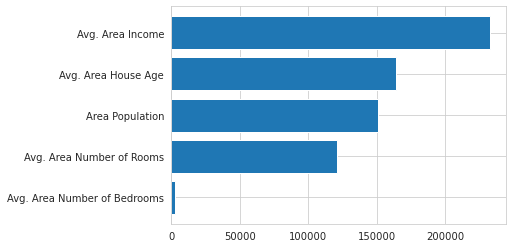

In [39]:
import matplotlib.pyplot as plt
features_std = features_std.sort_values('coefficient', ascending=True)
plt.barh(features_std.index, features_std.coefficient);

## Removing noise
Let's try a new model without the `Avg. Area Number of Bedrooms`

In [40]:
X = USA_Housing[['Avg. Area Income', 'Avg. Area House Age',
                 'Avg. Area Number of Rooms', 'Area Population']]

y = USA_Housing['Price']


from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.3,
                                                    random_state=42)

lm = LinearRegression(n_jobs=-1) 
lm.fit(X_train, y_train)

predictions = lm.predict(X_test)
predictions

# A little bit lower without Avg. Area Number of Bedrooms
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 81116.43361053693
MSE: 10062092569.298563
RMSE: 100309.98240104802
